In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import pandas as pd
import numpy as np


In [34]:
data = pd.read_csv("fraud_detection.csv")

# **DATA OVERVIEW**

In [35]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# We have a dataframe with 6,362,620 rows and 11 columns.

# 1. Columns:
#    - `step`: Represents the time step.
#    - `type`: Type of transaction (e.g., PAYMENT, TRANSFER, CASH_OUT).
#    - `amount`: Amount of the transaction.
#    - `nameOrig`: Account number of the originator.
#    - `oldbalanceOrg`: Initial balance before the transaction for the originator.
#    - `newbalanceOrig`: New balance after the transaction for the originator.
#    - `nameDest`: Account number of the destination.
#    - `oldbalanceDest`: Initial balance before the transaction for the destination.
#    - `newbalanceDest`: New balance after the transaction for the destination.
#    - `isFraud`: Indicates if the transaction is fraudulent (1 for fraud, 0 otherwise).
#    - `isFlaggedFraud`: Indicates if the transaction was flagged as fraud.

# 2. Observations:
#    - There are various types of transactions, including PAYMENT, TRANSFER, and CASH_OUT.
#    - The dataset contains both fraudulent (isFraud = 1) and non-fraudulent transactions.
#    - Some transactions involve a large amount of money, such as the TRANSFER and CASH_OUT types.

# 3. Potential Challenges:
#    - Class imbalance may exist, with fraudulent transactions being significantly less frequent than non-fraudulent ones.
#    - Understanding patterns and features that distinguish fraudulent transactions from legitimate ones will be crucial for model performance.
#    - Feature engineering might be necessary to extract meaningful information from account balances and transaction amounts.

# With these initial observations, we can proceed to explore the data further, visualize distributions, and begin building models for fraud detection. Let me know if you need more insights or if you'd like to start with any specific analysis!


In [36]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Insights from the first few rows:
# - The 'step' column represents the time step.
# - Various types of transactions are present, such as PAYMENT, TRANSFER, and CASH_OUT.
# - Some transactions involve significant amounts of money, as seen in the 'amount' column.
# - Both fraudulent and non-fraudulent transactions are included, as indicated by the 'isFraud' column.
# - The 'isFlaggedFraud' column suggests whether a transaction was flagged as fraudulent, though no flagged frauds are visible in the first few rows.

# This initial exploration provides a basis for further analysis and model building.

In [37]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


# Insights from the last few rows:
# - The 'step' column represents the time step.
# - The data includes various types of transactions, such as CASH_OUT and TRANSFER.
# - Some transactions involve large amounts of money, as seen in the 'amount' column.
# - The 'isFraud' column indicates whether a transaction is fraudulent (1 for fraud, 0 otherwise).
# - The 'isFlaggedFraud' column suggests whether a transaction was flagged as fraudulent, but no flagged frauds are visible in the last few rows.

# This overview of the last few rows complements our understanding of the dataset obtained from the first few rows.

In [38]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Insights from the summary statistics:
# - The 'amount' column varies significantly, with a mean of approximately $179,862 and a maximum value of $92,445,520.
# - Similar variations exist in the 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', and 'newbalanceDest' columns, suggesting diverse transaction amounts and balances.
# - The 'isFraud' column has a mean of approximately 0.13%, indicating a low overall fraud rate in the dataset.
# - The 'isFlaggedFraud' column has very few instances flagged as fraud, with a mean of approximately 0.00025%.

# These statistics provide valuable insights into the distribution and characteristics of the numerical features in the dataset.

In [39]:
data.describe(include='O')

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


# Insights from the summary statistics (with include='0'):
# - The 'type' column has 5 unique values, with 'CASH_OUT' being the most frequent type, appearing 2,237,500 times.
# - The 'nameOrig' column has 6,352,307 unique values, with 'C1902386530' being the most frequent, appearing 3 times.
# - The 'nameDest' column has 2,722,362 unique values, with 'C1286084959' being the most frequent, appearing 113 times.

# These insights provide a glimpse into the distribution and frequency of categorical features in the dataset.


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# Insights from the data information:
# - The dataframe contains 6,362,620 entries and 11 columns.
# - The 'step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', and 'isFlaggedFraud' columns are of numerical types (int64 or float64).
# - The 'type', 'nameOrig', and 'nameDest' columns are of object type, likely representing categorical or string data.
# - The memory usage of the dataframe is approximately 534.0 MB.

# This information provides an overview of the dataset's structure, including the data types and memory usage.


In [41]:
num_rows, num_cols = data.shape
print(f"Number of rows: {num_rows:,}")
print("Number of columns: ", num_cols)

Number of rows: 6,362,620
Number of columns:  11


# Insights from the data shape:
# - The dataframe contains 6,362,620 rows.
# - There are 11 columns in the dataframe.

# This information provides a quick overview of the size of the dataset in terms of rows and columns.


In [42]:
data['isFraud'].value_counts()


isFraud
0    6354407
1       8213
Name: count, dtype: int64

# Insights from the 'isFraud' column value counts:
# - There are 8,213 instances of fraudulent transactions (isFraud = 1).
# - The majority of transactions (6,354,407 instances) are non-fraudulent (isFraud = 0).

# This imbalance in the 'isFraud' column may need to be addressed during model training to ensure balanced performance and accurate fraud detection.


In [43]:
data.dtypes


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

# Insights from the data types:
# - The 'step' column is of type int64, representing the time step.
# - The 'type', 'nameOrig', and 'nameDest' columns are of type object, likely representing categorical or string data.
# - The 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', and 'isFlaggedFraud' columns are of type float64 or int64, representing numerical data.

# These data types align with our expectations based on the nature of the features.


In [44]:
data['type'].unique()


array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

# Insights from the unique values in the 'type' column:
# - There are five unique transaction types: 'PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', and 'CASH_IN'.
# - Each transaction type likely represents a different category of financial transaction.

# Understanding the distribution and patterns of these transaction types can provide valuable insights into the nature of the data and may be important for fraud detection modeling.


In [45]:
data['type'].value_counts()


type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

# Insights from the transaction type value counts:
# - The most common transaction type is 'CASH_OUT', with 2,237,500 instances.
# - 'PAYMENT' is the second most common transaction type, with 2,151,495 instances.
# - 'CASH_IN' and 'TRANSFER' are also prevalent, with 1,399,284 and 532,909 instances respectively.
# - 'DEBIT' transactions are the least common, with 41,432 instances.

# Understanding the distribution of transaction types is crucial for analyzing transaction patterns and potentially identifying fraudulent activities.


In [46]:
data.groupby(['type', 'amount'])['isFraud'].sum().sort_values(ascending=False)


type      amount     
TRANSFER  10000000.00    145
CASH_OUT  10000000.00    142
          0.00            16
          1165187.89       2
TRANSFER  429257.45        2
                        ... 
CASH_OUT  68162.23         0
          68162.12         0
          68161.98         0
          68161.93         0
TRANSFER  92445516.64      0
Name: isFraud, Length: 5630865, dtype: int64

# Insights from the groupby operation on transaction type and amount:
# - The highest number of fraudulent transactions occurs in the 'TRANSFER' and 'CASH_OUT' types, particularly for large amounts such as $10,000,000.
# - There are instances of fraudulent transactions even for zero amounts in the 'CASH_OUT' type.
# - Other transaction types, such as 'CASH_IN' and 'PAYMENT', seem to have fewer instances of fraud.

# Identifying patterns in fraudulent transactions based on transaction type and amount can aid in developing targeted fraud detection strategies.


# **DATA CLEANING**

In [47]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# Insights from checking for missing values:
# - There are no missing values in any of the columns of the dataset.

# This indicates that the dataset is clean in terms of missing data, which is essential for further analysis and modeling.


In [48]:
numerical_cols = ['oldbalanceOrg', 'newbalanceOrig']
for col in numerical_cols:
    mean_val = data[col].mean()
    data[col].fillna(mean_val, inplace=True)

In [49]:
data['nameDest'].fillna(data['nameDest'].mode()[0], inplace=True)

# Verify that there are no more missing values
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


# Insights after filling missing values:
# - The missing values in the 'nameDest' column have been filled using the mode (most frequent value) of the column.
# - After filling missing values, there are no longer any missing values present in any of the columns of the dataset.

# Filling missing values ensures completeness of the data, which is important for accurate analysis and modeling.


In [50]:
data.duplicated().sum()

0

# Insights from checking for duplicated rows:
# - There are no duplicated rows in the dataset.

# The absence of duplicated rows indicates that each row in the dataset represents a unique observation, which is essential for accurate analysis and modeling.


In [72]:
data['type'].unique()

array([3, 4, 1, 2, 0])

# Insights from the unique transaction types:
# - The unique transaction types are represented by numerical codes [3, 4, 1, 2, 0].
# - Based on the provided mapping, the transaction types correspond to:
#   - 0: Unknown or missing type
#   - 1: PAYMENT
#   - 2: TRANSFER
#   - 3: CASH_OUT
#   - 4: DEBIT
# - Understanding the mapping of numerical codes to transaction types is crucial for proper interpretation of the data and subsequent analysis.


In [52]:
type_amount_sum = data.groupby('type')['amount'].sum()
type_amount_sum

type
CASH_IN     2.363674e+11
CASH_OUT    3.944130e+11
DEBIT       2.271992e+08
PAYMENT     2.809337e+10
TRANSFER    4.852920e+11
Name: amount, dtype: float64

# Insights from the total sum of amounts for each transaction type:
# - The total sum of transaction amounts for each type is as follows:
#   - CASH_IN: $236,367,400,000
#   - CASH_OUT: $394,413,000,000
#   - DEBIT: $227,199,200
#   - PAYMENT: $28,093,370,000
#   - TRANSFER: $485,292,000,000
# - TRANSFER transactions have the highest total amount, followed by CASH_OUT and CASH_IN transactions.
# - Understanding the distribution of total transaction amounts across different types provides insights into the volume and nature of financial transactions.


# **DATA VISUALIZATION**

In [53]:
import plotly.express as px

# Group the data by 'type' and calculate the sum of 'amount' for each type
type_amount_sum = data.groupby('type')['amount'].sum().reset_index()

# Create a bar plot using Plotly
fig = px.bar(type_amount_sum, x='type', y='amount',
             title='Total Amount by Transaction Type',
             labels={'type': 'Transaction Type', 'amount': 'Total Amount'})

# Display the plot
fig.show()


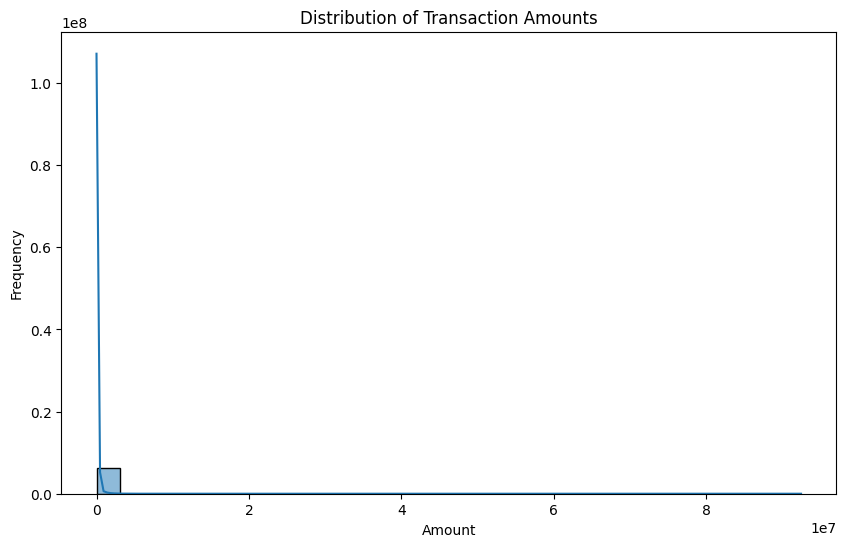

In [54]:
# distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


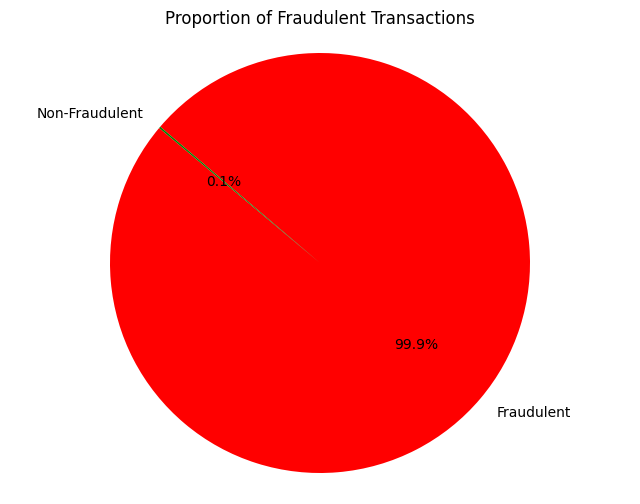

In [55]:
# pie chart showing the proportion of fraudulent and non-fraudulent transactions
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of each category in the 'isFraud' column
fraud_counts = data['isFraud'].value_counts()

# Define custom colors
colors = ['red', 'green']

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(fraud_counts, labels=['Fraudulent', 'Non-Fraudulent'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Proportion of Fraudulent Transactions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()



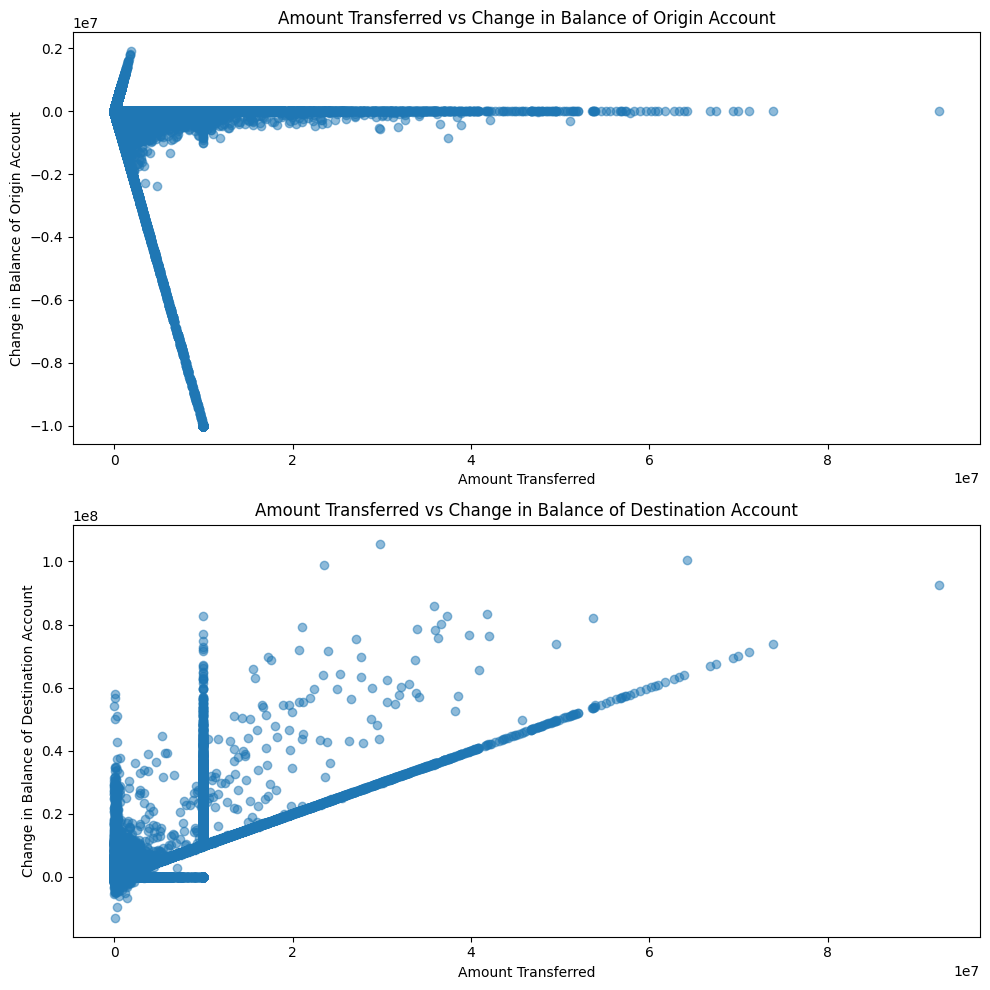

In [56]:
# Scatterplot 1 showing relationship between the amount of money transferred and the change in balance of the origin account.
# Scalletplot 2 shoeing relationship between the amount of money transferred and the change in balance of the destination account.

import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame and 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest' are your columns
data['balanceChangeOrg'] = data['newbalanceOrig'] - data['oldbalanceOrg']
data['balanceChangeDest'] = data['newbalanceDest'] - data['oldbalanceDest']

fig, ax = plt.subplots(2, figsize=(10,10))

ax[0].scatter(data['amount'], data['balanceChangeOrg'], alpha=0.5)
ax[0].set_xlabel('Amount Transferred')
ax[0].set_ylabel('Change in Balance of Origin Account')
ax[0].set_title('Amount Transferred vs Change in Balance of Origin Account')

ax[1].scatter(data['amount'], data['balanceChangeDest'], alpha=0.5)
ax[1].set_xlabel('Amount Transferred')
ax[1].set_ylabel('Change in Balance of Destination Account')
ax[1].set_title('Amount Transferred vs Change in Balance of Destination Account')

plt.tight_layout()
plt.show()


c:\Users\alwin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



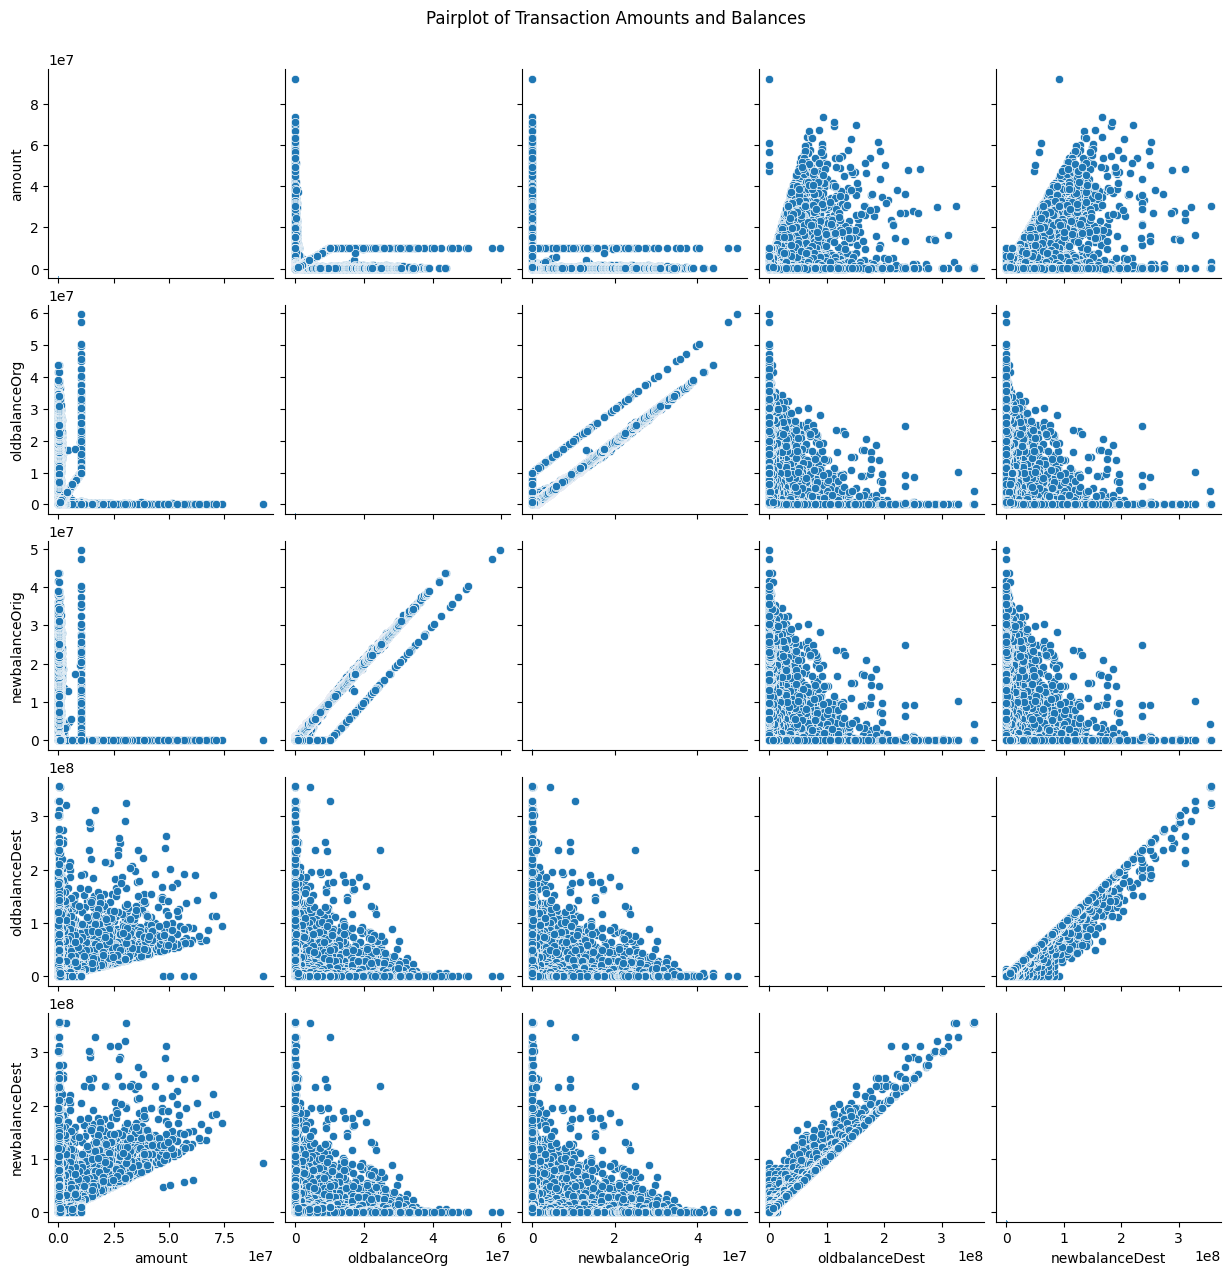

In [57]:
# Plotting Pairplot of Transaction Amounts and Balances

sns.pairplot(data=data, vars=['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'])
plt.suptitle('Pairplot of Transaction Amounts and Balances', y=1.02)
plt.show()


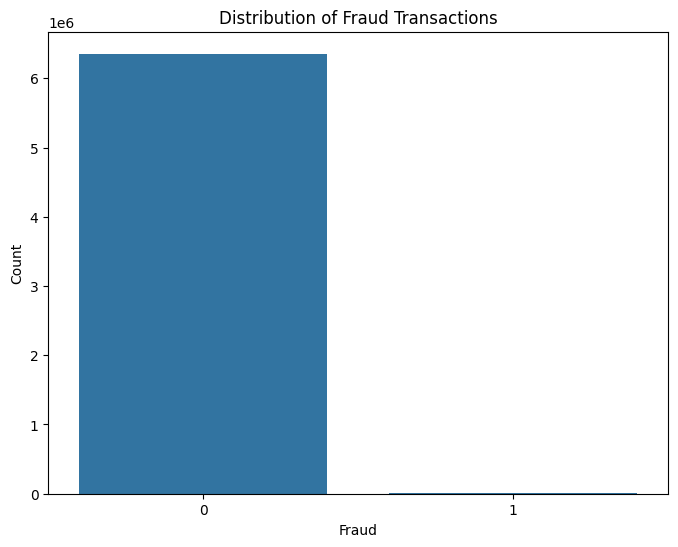

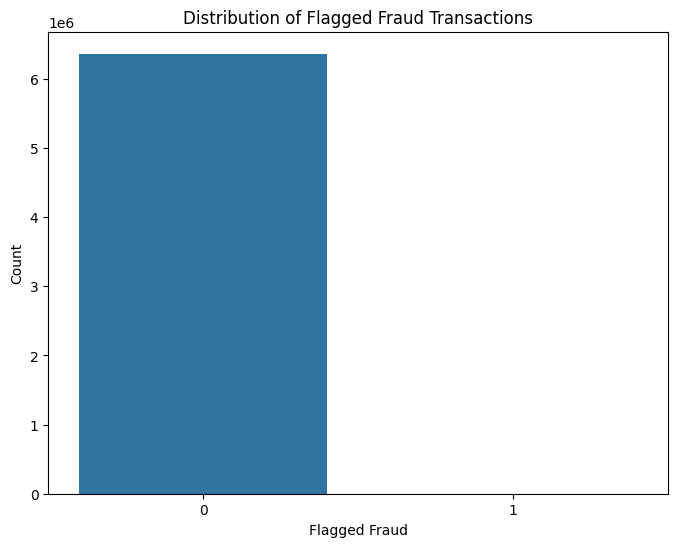

In [58]:
# Count plot: Distribution of fraud transactions

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='isFraud', data=data)
plt.title('Distribution of Fraud Transactions')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

# Count plot: Distribution of Flagged fraud transactions

plt.figure(figsize=(8, 6))
sns.countplot(x='isFlaggedFraud', data=data)
plt.title('Distribution of Flagged Fraud Transactions')
plt.xlabel('Flagged Fraud')
plt.ylabel('Count')
plt.show()

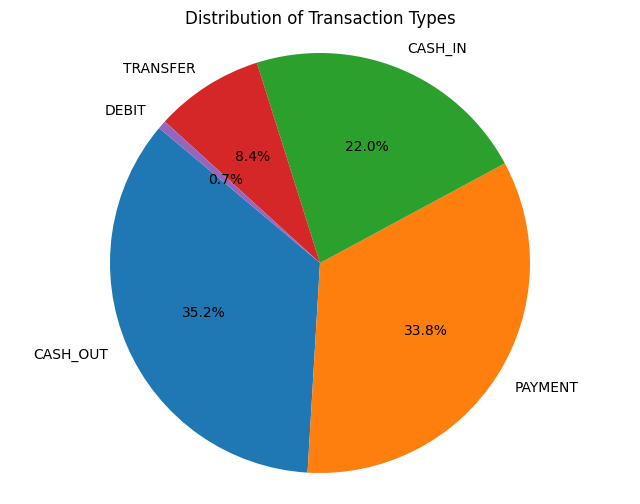

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each transaction type
transaction_counts = data['type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(transaction_counts, labels=transaction_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Transaction Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [60]:
# Subploats showing showing the distribution of transaction amounts and transaction steps using histograms

amount_val = data['amount'].values
time_val = data['step'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Step', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
plt.show()

C:\Users\alwin\AppData\Local\Temp\ipykernel_21696\1993183792.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\alwin\AppData\Local\Temp\ipykernel_21696\1993183792.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




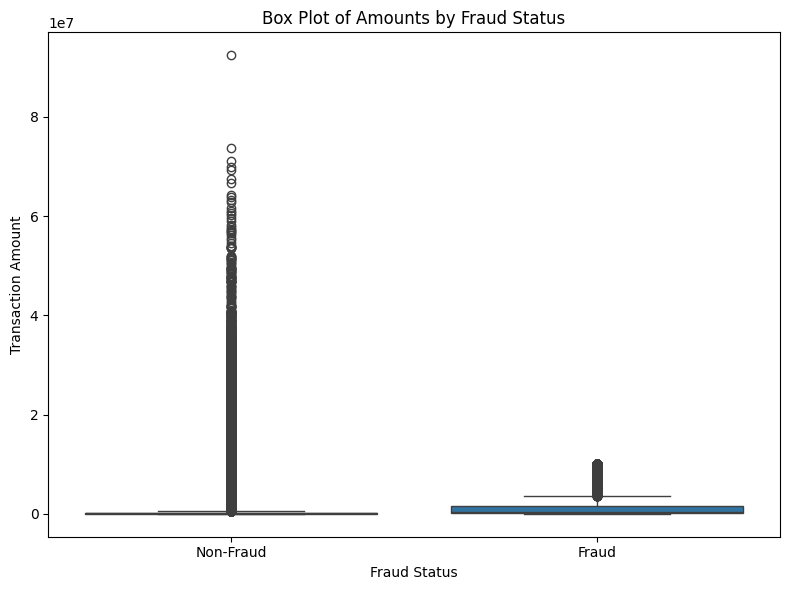

In [61]:
# box plot to visualize the distribution of transaction steps (step) based on fraud status (isFraud).
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='isFraud', y='amount')
plt.title("Box Plot of Amounts by Fraud Status")
plt.xlabel("Fraud Status")
plt.ylabel("Transaction Amount")
plt.xticks([0, 1], labels=["Non-Fraud", "Fraud"])
plt.tight_layout()
plt.show()

In [62]:
num_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Printing statistical summaries of these numeric columns in our dataset
data[num_columns].describe()


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08


C:\Users\alwin\AppData\Local\Temp\ipykernel_21696\1317493127.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



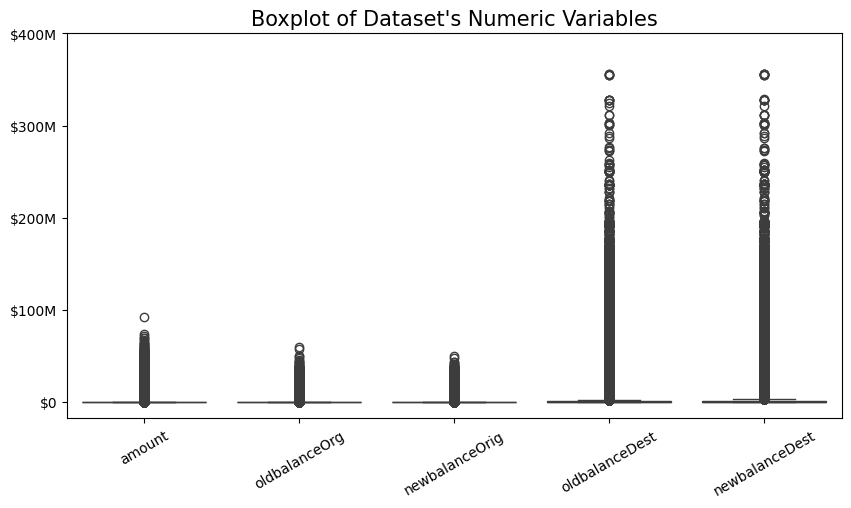

In [63]:
# Box plot to visualize the distribution of numeric variablesnum_columns = data.select_dtypes(include='number').columns
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=data[num_columns], ax=ax)
ax.set_xticklabels(num_columns, rotation=30)
ax.set_yticks(range(0,500000000,100000000))
ax.set_yticklabels(['$0', '$100M', '$200M', '$300M', '$400M'])
plt.title('Boxplot of Dataset\'s Numeric Variables', fontsize=15)
plt.style.use('ggplot')
plt.show()

In [64]:
#Normalize the numeric columns in data_copy, filling NaN values with the mean of each column before normalization.

from sklearn.preprocessing import Normalizer

# Creating an instance of the normalizer
norm = Normalizer()
columns_to_keep = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', \
                   'oldbalanceDest', 'newbalanceDest', 'isFraud']
data_copy = data[columns_to_keep].copy(deep=True)

# Fill NaN values with the mean of each column
data_copy[num_columns] = data_copy[num_columns].fillna(data_copy[num_columns].mean())

# Replacing the numeric columns with their normalized values
num_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
data_copy[num_columns] = norm.fit_transform(data_copy[num_columns])


<Figure size 640x480 with 0 Axes>

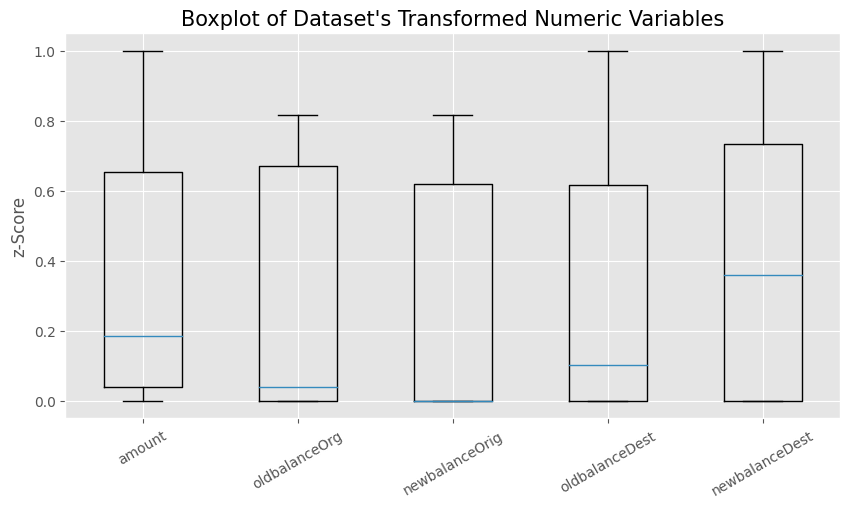

In [65]:
# Box plot to visualize the distribution of transformed numeric variables in the dataset data_copy, with the y-axis labeled as 'z-Score'.

plt.clf()  # Clearing the previous plot formatting
fig, ax = plt.subplots(figsize=(10,5))
plt.boxplot(x=data_copy[num_columns])
ax.set_xticklabels(num_columns, rotation=30)  # Relabeling the x-axis
plt.ylabel('z-Score')
plt.title('Boxplot of Dataset\'s Transformed Numeric Variables', fontsize=15)
plt.style.use('ggplot')
plt.show()

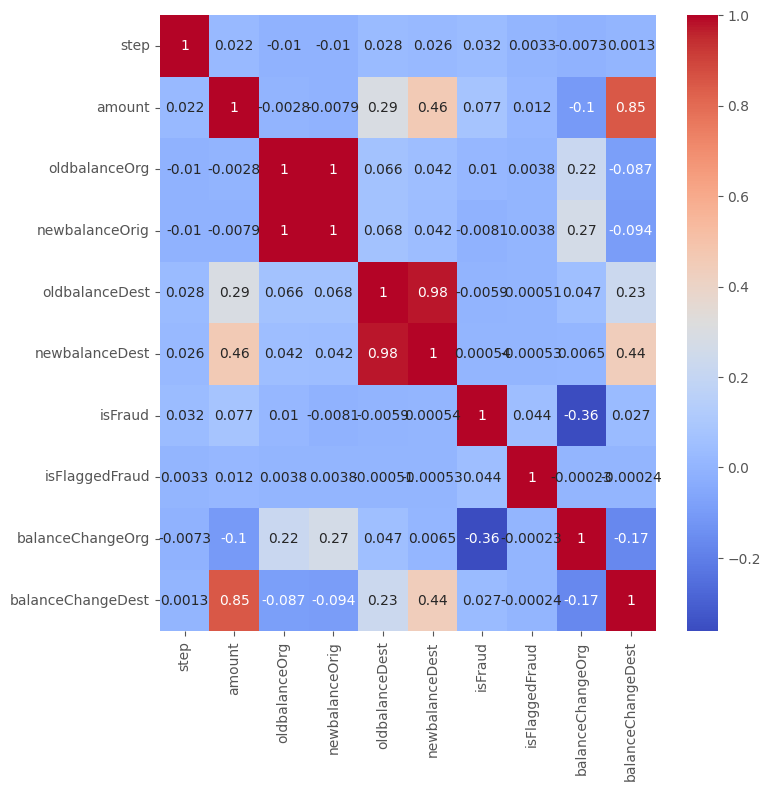

In [66]:
# Selecting only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include='number')

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [67]:
# Calculate the correlation of numeric columns with the 'isFraud' column, excluding non-numeric columns.

# Selecting only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include='number')

# Calculating the correlation with 'isFraud' column
correlation = numeric_data.corr()['isFraud']

# Sorting the correlations in descending order
sorted_correlation = correlation.sort_values(ascending=False)

print(sorted_correlation)


isFraud              1.000000
amount               0.076688
isFlaggedFraud       0.044109
step                 0.031578
balanceChangeDest    0.027028
oldbalanceOrg        0.010154
newbalanceDest       0.000535
oldbalanceDest      -0.005885
newbalanceOrig      -0.008148
balanceChangeOrg    -0.362472
Name: isFraud, dtype: float64


In [68]:
# Convert the 'type' column in the DataFrame data from categorical values to numeric labels.

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['type'] = labelencoder.fit_transform(data['type'])
print(data['type'])

0          3
1          3
2          4
3          1
4          3
          ..
6362615    1
6362616    4
6362617    1
6362618    4
6362619    1
Name: type, Length: 6362620, dtype: int32


In [69]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceChangeOrg,balanceChangeDest
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,-9839.64,0.0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,-1864.28,0.0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,-181.00,0.0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,-181.00,-21182.0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,-11668.14,0.0


In [71]:
# Downloading Cleaned Data in csv format
data.to_csv('cleaned_data.csv', index=False)


# **MODEL CREATION**

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Drop rows with missing target values
data_copy = data_copy.dropna(subset=['isFraud'])

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(data_copy[num_columns])

# Impute missing target values with the mean
target_imputer = SimpleImputer(strategy='mean')
y_imputed = target_imputer.fit_transform(data_copy[['isFraud']])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Creating a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Training the model
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9997883781694344


# Insights from model evaluation:
# - The Decision Tree classifier achieves a high accuracy of approximately 99.98% on the test data.
# - The high accuracy suggests that the model is performing well in predicting whether transactions are fraudulent or not.
# - However, it's essential to further evaluate the model's performance using additional metrics and techniques to ensure its robustness and generalization ability.


In [ ]:
#Calculating Precision and Recall

from sklearn.metrics import precision_score, recall_score

# Assuming 'y_test' is the true labels for the test set and 'y_pred' is the predicted labels
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.8807631160572337
Recall: 0.8496932515337423


# Insights from precision and recall scores:
# - Precision measures the proportion of correctly predicted fraudulent transactions among all transactions predicted as fraudulent. 
#   - The precision score is approximately 0.881, indicating that around 88.1% of transactions predicted as fraudulent are actually fraudulent.
# - Recall measures the proportion of correctly predicted fraudulent transactions among all actual fraudulent transactions.
#   - The recall score is approximately 0.850, indicating that around 85.0% of actual fraudulent transactions are correctly identified by the model.
# - Both precision and recall scores are important metrics for evaluating the performance of a fraud detection model.
# - A balance between precision and recall is crucial, as optimizing one may lead to a decrease in the other. It depends on the specific requirements and constraints of the fraud detection system.


In [ ]:
# Calculating ROC-AUC Score and F1 Score

from sklearn.metrics import f1_score, roc_auc_score

# Assuming clf is your classifier
y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Assuming positive class is index 1

f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("ROC-AUC Score:", roc_auc)
print("F1 Score:", f1)


ROC-AUC Score: 0.9270855652263073
F1 Score: 0.8649492583918812


# Insights from ROC-AUC score and F1 score:
# - ROC-AUC score measures the area under the Receiver Operating Characteristic (ROC) curve, which plots the True Positive Rate (TPR) against the False Positive Rate (FPR).
#   - The ROC-AUC score is approximately 0.927, indicating that the model performs well in distinguishing between fraudulent and non-fraudulent transactions.
# - F1 score is the harmonic mean of precision and recall, providing a balance between the two metrics.
#   - The F1 score is approximately 0.865, which is a combined measure of precision and recall. It considers both false positives and false negatives in its calculation.
# - Both ROC-AUC score and F1 score are important metrics for evaluating the performance of a binary classification model, especially in imbalanced datasets like fraud detection.
# - A high ROC-AUC score and F1 score indicate that the model is performing well in identifying fraudulent transactions while minimizing false positives and false negatives.


In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[816769     75]
 [    98    554]]


# Insights from the confusion matrix:
# - The confusion matrix provides a summary of the model's performance by comparing predicted labels with actual labels.
# - In the confusion matrix:
#   - True Positives (TP): 554
#   - False Positives (FP): 75
#   - True Negatives (TN): 816,769
#   - False Negatives (FN): 98
# - True Positives (TP) are instances where the model correctly predicts fraudulent transactions.
# - False Positives (FP) are instances where the model incorrectly predicts non-fraudulent transactions as fraudulent.
# - True Negatives (TN) are instances where the model correctly predicts non-fraudulent transactions.
# - False Negatives (FN) are instances where the model incorrectly predicts fraudulent transactions as non-fraudulent.
# - The confusion matrix provides a detailed breakdown of the model's performance, enabling further analysis and fine-tuning of the model.


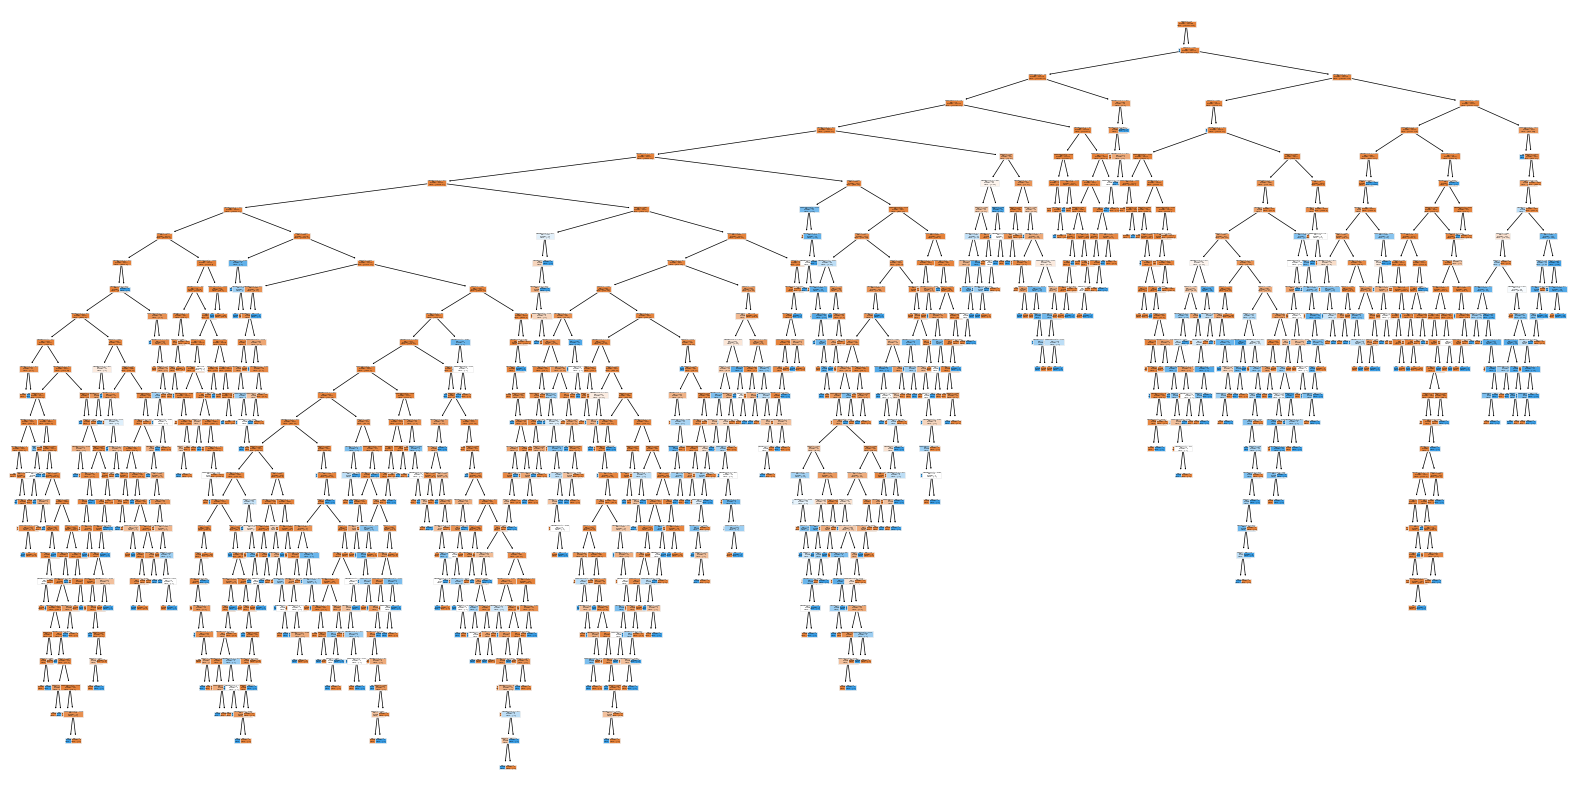

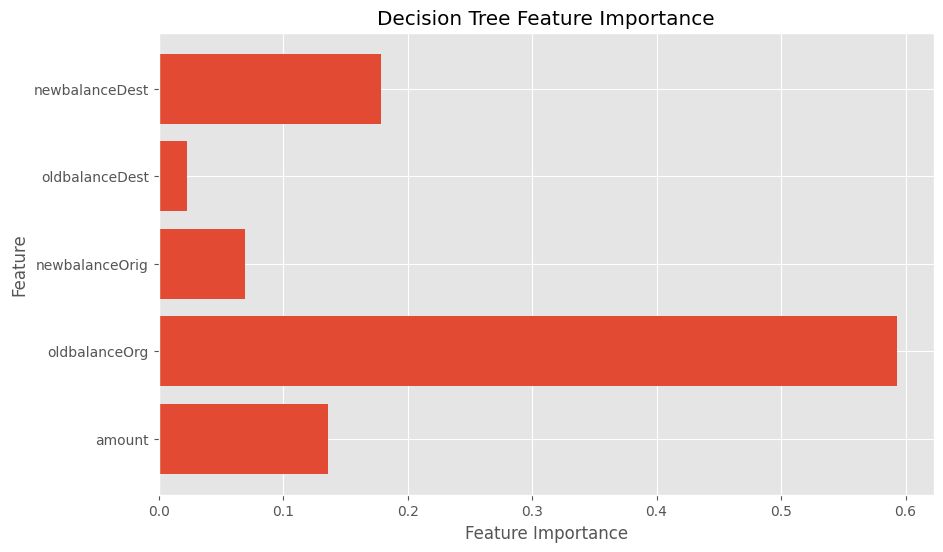

In [ ]:
# Performing Model Interpretation

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plotting the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=num_columns)
plt.show()

# Visualizing feature importance
feature_importance = clf.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(num_columns, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.show()

# Insights from model interpretation:
# - Decision Tree Visualization:
#   - The decision tree visualization provides a graphical representation of the decision-making process of the model.
#   - It illustrates how the model splits the data based on different features to make predictions.
#   - By analyzing the decision tree, we can understand the criteria used by the model to classify transactions as fraudulent or non-fraudulent.
#   - Decision trees are interpretable models, making it easier to understand the logic behind the model's predictions.

# - Feature Importance Visualization:
#   - The feature importance plot shows the importance of each feature in making decisions within the decision tree.
#   - Features with higher importance contribute more to the decision-making process of the model.
#   - By visualizing feature importance, we can identify which features have the most significant impact on predicting fraudulent transactions.
#   - This information is valuable for understanding the key factors contributing to fraud detection and can guide feature selection and engineering efforts.


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pickle
import joblib

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=16), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Ensemble Methods - Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Deployment
filename = 'finalized_model.sav'
joblib.dump(rf, filename)

